<a href="https://colab.research.google.com/github/federicocanzonieri/DeepLearning/blob/main/Lezione2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
import numpy as np
import torch
from torch import nn



np.random.seed(123)
torch.random.manual_seed(123)

boston=load_boston()
X=boston.data
y=boston.target

idx=np.random.permutation(len(X))

X=X[idx]
y=y[idx]


X_training=torch.Tensor(X[50:])
Y_training=torch.Tensor(y[50:])

X_testing=torch.Tensor(X[:50])
Y_testing=torch.Tensor(y[:50])

In [ ]:
class LinearRegressor(nn.Module):

  def __init__(self,in_size,out_size):

      super(LinearRegressor,self).__init__()

      self.linear=nn.Linear(in_size,out_size)

  def forward(self,x):

      result=self.linear(x)
      return result


In [ ]:
from torch.utils.tensorboard import SummaryWriter


lr=0.01
epochs=300

writer=SummaryWriter('logs/linear_regressor_1')

means=X_training.mean(0)
stds=X_training.std(0)


X_training_norm=(X_training-means)/stds
X_testing_norm=(X_testing-means)/stds

reg=LinearRegressor(13,1)
criterion=nn.MSELoss()

optimizer=torch.optim.SGD(reg.parameters(),lr=lr)

for e in range(epochs):
  reg.train()
  output=reg(X_training_norm)
  l=criterion(output.view(-1),Y_training)

  writer.add_scalar('loss/train',l.item(),global_step=e)
  l.backward()

  optimizer.step()
  optimizer.zero_grad()

  reg.eval()

  with torch.set_grad_enabled(False):
      y_test=reg(X_testing_norm)
      l=criterion(y_test.view(-1),Y_testing)
      writer.add_scalar('loss/test',l.item(),global_step=e)


preds_train=reg(X_training_norm)
preds_testing=reg(X_testing_norm)

def MSE(predictions,gt):

  assert predictions.shape==gt.shape
  return ((predictions-gt)**2).mean()

print("MSE Train: {:0.2f}".format(MSE(preds_train.view(-1),Y_training)))
print("MSE Test:  {:0.2f}".format(MSE(preds_testing.view(-1),Y_testing)))


def RMSE(predictions,gt):
  #detach necessario!
  return np.sqrt(MSE(predictions.detach(),gt))


print("RMSE Train: {:0.2f}".format(RMSE(preds_train.view(-1),Y_training)))
print("RMSE Test:  {:0.2f}".format(RMSE(preds_testing.view(-1),Y_testing)))



def MAE(predictions,gt):
  #detach necessario!
  assert predictions.shape==gt.shape
  return (predictions-gt).abs().mean()


print("MAE Train: {:0.2f}".format(MAE(preds_train.view(-1),Y_training)))
print("MAE Test:  {:0.2f}".format(MAE(preds_testing.view(-1),Y_testing)))




MSE Train: 20.52
MSE Test:  44.04
RMSE Train: 4.53
RMSE Test:  6.64
MAE Train: 3.08
MAE Test:  4.31


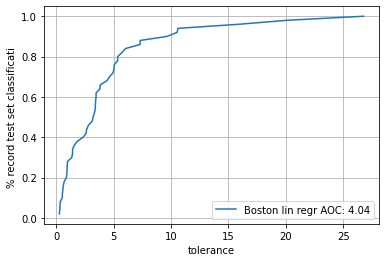

80 % del test set è stato classificato con una soglia di tolleranza di 5(mila dollari) 
5.3446846
0.8


In [ ]:
## REC
from matplotlib import pyplot as plt

def rec_curve(pred,gt):

  assert pred.shape==gt.shape

  errors=np.abs(np.array((pred.detach()-gt)))
  tolerance=sorted(np.unique(errors))
  correct=[]

  for t in tolerance:
    correct.append((errors<=t).mean())

  AUC=np.trapz(correct,tolerance)
  tot_area=np.max(tolerance)
  AOC=tot_area-AUC

  return tolerance,correct,AOC

boston_linear_regressor_rec=rec_curve(preds_testing.view(-1),Y_testing)
plt.plot(boston_linear_regressor_rec[0],boston_linear_regressor_rec[1])
plt.legend(['Boston lin regr AOC: %0.2f' %boston_linear_regressor_rec[2]])
plt.xlabel('tolerance')
plt.ylabel('% record test set classificati ')
plt.grid()
plt.show()

print("80 % del test set è stato classificato con una soglia di tolleranza di 5(mila dollari) ")
id=(np.argwhere(np.array(boston_linear_regressor_rec[1])==0.8)).reshape(-1)
print(boston_linear_regressor_rec[0][int(id)])
print(boston_linear_regressor_rec[1][int(id)])

# print(boston_linear_regressor_rec[1])

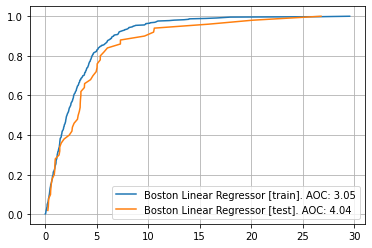

In [ ]:
boston_linear_regressor_training_rec = rec_curve(preds_train.view(-1),Y_training)
boston_linear_regressor_testing_rec = rec_curve(preds_testing.view(-1),Y_testing)
plt.plot(boston_linear_regressor_training_rec[0], boston_linear_regressor_training_rec[1])
plt.plot(boston_linear_regressor_testing_rec[0], boston_linear_regressor_testing_rec[1])
plt.legend(['Boston Linear Regressor [train]. AOC: %0.2f'%boston_linear_regressor_training_rec[2],'Boston Linear Regressor [test]. AOC: %0.2f'%boston_linear_regressor_testing_rec[2]])
plt.grid()
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer


dataset=load_breast_cancer()
X=dataset.data
y=dataset.target

print(X.shape,y.shape)


(569, 30) (569,)


In [ ]:
##LOG

np.random.seed(1234)
torch.random.manual_seed(1234)

idx=np.random.permutation(len(X))

X=X[idx]
y=y[idx]


X_training = torch.Tensor(X[100:])
Y_training = torch.Tensor(y[100:])
X_testing = torch.Tensor(X[:100])
Y_testing = torch.Tensor(y[:100])


X_mean = X_training.mean(0)
X_std = X_training.std(0)
X_training_norm = (X_training-X_mean)/X_std
X_testing_norm = (X_testing-X_mean)/X_std


In [ ]:
lin_reg=nn.Linear(30,1)
z = lin_reg(X_training_norm)
print(z[:10]) #stampiamo i primi 10 valori predetti

print(z.min())
print(z.max())


def logistic(z):
  return 1./(1+torch.exp(-z))

tensor([[-0.1096],
        [ 0.0380],
        [ 0.2178],
        [ 0.3410],
        [ 0.1903],
        [ 0.4142],
        [-0.0980],
        [-0.0238],
        [ 0.1587],
        [ 0.1500]], grad_fn=<SliceBackward>)
tensor(-0.9687, grad_fn=<MinBackward1>)
tensor(1.2384, grad_fn=<MaxBackward1>)


In [ ]:
p = logistic(z)
print(p[:10])

tensor([[0.4726],
        [0.5095],
        [0.5542],
        [0.5844],
        [0.5474],
        [0.6021],
        [0.4755],
        [0.4941],
        [0.5396],
        [0.5374]], grad_fn=<SliceBackward>)


In [ ]:
sigmoid=nn.Sigmoid()
p2=sigmoid(z)
print(p2.min())
print(p2.max())

def loss(p,y):
  return (-y*torch.log(p)-(1-y)*torch.log(1-p)).mean()

tensor(0.2751, grad_fn=<MinBackward1>)
tensor(0.7753, grad_fn=<MaxBackward1>)


In [ ]:
print(loss(p,Y_training.view(-1,1)))
loss = nn.BCELoss()
print(loss(p,Y_training.view(-1,1)))

tensor(0.6579, grad_fn=<MeanBackward0>)
tensor(0.6579, grad_fn=<BinaryCrossEntropyBackward>)


In [ ]:
class LogisticRegressor(nn.Module):

  def __init__(self,in_features):

    super(LogisticRegressor,self).__init__()
    self.linear=nn.Linear(in_features,1)
    self.logistic=nn.Sigmoid()


  def forward(self,x):
    logits=self.linear(x)
    return self.logistic(logits)
    


lr=0.01
epochs=500

means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
#Passo 2: inizializziamo il modello
regressor = LogisticRegressor(30)
loss = nn.BCELoss()
sgd = torch.optim.SGD(regressor.parameters(), lr)


for e in range(epochs):

  regressor.train()
  p=regressor(X_training_norm)

  l=loss(p,Y_training.view(-1,1))
  l.backward()

  sgd.step()
  sgd.zero_grad()

  regressor.eval()
  with torch.set_grad_enabled(False):

      p=regressor(X_testing_norm)
      l=loss(p,Y_testing.view(-1,1))



p_test=regressor(X_testing_norm)
print(loss(p_test,Y_testing.view(-1,1)))

pr_train=regressor(X_training_norm)
pr_test=regressor(X_testing_norm)

pred_train=pr_train>=0.5
pred_test=pr_test>=0.5



def accuracy(pred,gt):
  correct=pred.view(-1).byte()==gt.view(-1).byte()

  return float(correct.sum())/len(correct)


print("Accuracy di training: {:0.2f}".format(accuracy(pred_train,Y_training)))
print("Accuracy di test: {:0.2f}".format(accuracy(pred_test,Y_testing)))
pred=pred_train
# print(pred)
print(pred.view(-1))
print(pred.view(-1).shape)

print(pred.view(-1).byte())


tensor(0.1860, grad_fn=<BinaryCrossEntropyBackward>)
Accuracy di training: 0.97
Accuracy di test: 0.93
tensor([False, False,  True,  True, False,  True,  True, False, False,  True,
        False,  True,  True, False,  True,  True,  True, False,  True, False,
         True,  True,  True,  True, False,  True, False, False,  True,  True,
        False,  True, False,  True,  True,  True,  True,  True,  True, False,
         True, False, False,  True, False,  True,  True,  True, False, False,
         True,  True, False,  True,  True, False,  True, False, False,  True,
         True,  True, False,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True, False, False,  True,  True,  True,  True, False,
         True,  True,  True, False,  True, False,  True,  True,  True,  True,
        False,  True,  True, False, False,  True, False, False,  True, False,
         True,  True,  True, False,  True,  True, False,  True,  True,  True,
         True, False,  True,  True,  Tr

In [ ]:
189*91/100

171.99

In [ ]:
def loss2(z,y):
  return (y*torch.log(1+torch.exp(-z))+(1-y)*torch.log(1+torch.exp(z))).mean()

In [ ]:
class LogisticRegressor(nn.Module):
  def __init__(self,in_features):
      super(LogisticRegressor,self).__init__()
      self.linear=nn.Linear(in_features,1)

  def forward(self,x):
    logits=self.linear(x)
    return logits


regressor=LogisticRegressor(30)
logistic=nn.Sigmoid()
z=regressor(X_training_norm)
p=logistic(z)

loss_stable=nn.BCEWithLogitsLoss()
l_1=loss_stable(z,Y_training.view(-1,1))
l_2=loss2(z,Y_training.view(-1,1))
print(l_1,l_2)

tensor(0.5498, grad_fn=<BinaryCrossEntropyWithLogitsBackward>) tensor(0.5498, grad_fn=<MeanBackward0>)


In [ ]:
class LogisticRegressor(nn.Module):

  def __init__(self,in_features):

    super(LogisticRegressor,self).__init__()
    self.linear=nn.Linear(in_features,1)
    self.logistic=nn.Sigmoid()


  def forward(self,x):
    logits=self.linear(x)
    return self.logistic(logits)
    


lr=0.01
epochs=500



X_training = torch.Tensor(X[100:])
Y_training = torch.Tensor(y[100:])
X_testing = torch.Tensor(X[:100])
Y_testing = torch.Tensor(y[:100])



means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
#Passo 2: inizializziamo il modello
regressor = LogisticRegressor(30)
loss = nn.BCEWithLogitsLoss()
sgd = torch.optim.SGD(regressor.parameters(), lr,weight_decay=0.001,momentum=0.9)


for e in range(epochs):

  regressor.train()
  p=regressor(X_training_norm)

  l=loss(p,Y_training.view(-1,1))
  l.backward()

  sgd.step()
  sgd.zero_grad()

  regressor.eval()
  with torch.set_grad_enabled(False):

      p=regressor(X_testing_norm)
      l=loss(p,Y_testing.view(-1,1))



p_test=regressor(X_testing_norm)
print(loss(p_test,Y_testing.view(-1,1)))

pr_train=regressor(X_training_norm)
pr_test=regressor(X_testing_norm)
print(X_training_norm.shape,Y_training.shape)
pred_train=pr_train>=0.5
pred_test=pr_test>=0.5



def accuracy(pred,gt):
  correct=pred.view(-1).byte()==gt.view(-1).byte()

  return float(correct.sum())/len(correct)


print("acc train".format(accuracy(pred_train,Y_training)))

# print(pred)


tensor(0.4989, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
torch.Size([469, 30]) torch.Size([469])
acc train


In [ ]:
from sklearn.metrics import accuracy_score
acc_training = accuracy_score(Y_training,pred_train)
acc_testing = accuracy_score(Y_testing,pred_test)
print("Accuracy di training: {:0.2f}".format(acc_training))
print("Accuracy di test: {:0.2f}".format(acc_testing))

Accuracy di training: 0.97
Accuracy di test: 0.94


In [ ]:
from sklearn.metrics import confusion_matrix
cm_training = confusion_matrix(Y_training,pred_train)
cm_testing = confusion_matrix(Y_testing,pred_test)
print(cm_training)
print(cm_testing)

[[171   4]
 [  9 285]]
[[33  4]
 [ 2 61]]


In [ ]:
cm_testing = cm_testing.astype(float)/cm_testing.sum(1).reshape(-1,1)
print(cm_testing)

[[0.89189189 0.10810811]
 [0.03174603 0.96825397]]


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_training = precision_score(Y_training, pred_train)
precision_test = precision_score(Y_testing, pred_test)
recall_training = recall_score(Y_training, pred_train)
recall_test = recall_score(Y_testing, pred_test)
print(precision_training, recall_training)
print(precision_test, recall_test)

0.986159169550173 0.9693877551020408
0.9384615384615385 0.9682539682539683


In [ ]:
from sklearn.metrics import f1_score
scores_training = f1_score(Y_training,pred_train, average=None)
scores_testing = f1_score(Y_testing,pred_test, average=None)
print(scores_training)
print(scores_testing)
print(scores_training.mean())
print(scores_testing.mean())

[0.96338028 0.97770154]
[0.91666667 0.953125  ]
0.9705409127147102
0.9348958333333334


In [ ]:
class LinearRegressor(nn.Module):

  def __init__(self,in_size,out_size):

      super(LinearRegressor,self).__init__()

      self.linear=nn.Linear(in_size,out_size)

  def forward(self,x):

      result=self.linear(x)
      return result





linear.weight tensor([[-0.2160]])
linear.bias tensor([0.2169])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


MSE Train: 3.54
RMSE Train: 1.88
<generator object Module.parameters at 0x7f3028335e50>
MAE Train: 1.82
torch.Size([1000, 1]) torch.Size([1000, 1])
tensor([[-1.6083],
        [-1.9186],
        [-1.5851],
        [-1.5836],
        [-2.0462],
        [-1.9369],
        [-1.1803],
        [-1.5288],
        [-1.8993],
        [-1.3204]]) tensor([[ 0.2120],
        [ 0.0484],
        [ 0.2243],
        [ 0.2251],
        [-0.0189],
        [ 0.0388],
        [ 0.4377],
        [ 0.2539],
        [ 0.0586],
        [ 0.3638]], grad_fn=<SliceBackward>)
linear.weight tensor([[-0.2145]])
linear.bias tensor([0.2059])


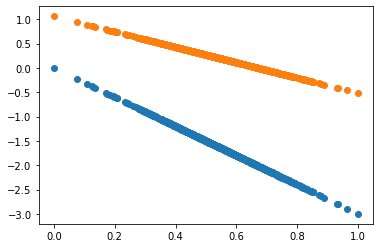

<Figure size 432x288 with 0 Axes>

In [ ]:


lr=0.000003
epochs=1000


points=1000
X_poly=np.random.randn(points,1)

X_training=torch.Tensor(X_poly)#,X_poly**2]))
Y_training=torch.Tensor(3*X_training)

reg=LinearRegressor(1,1)

writer=SummaryWriter('logs/linear_regressor_1')

min=torch.min(X_training)
max=torch.max(X_training)


stds=X_training.std(0)


X_training_norm=(X_training-min)/(max-min)
Y_training=torch.Tensor(-3*X_training_norm)

plt.scatter(X_training_norm[:,0],Y_training)

#X_testing_norm=(X_testing-means)/stds

criterion=nn.MSELoss()

optimizer=torch.optim.SGD(reg.parameters(),lr=lr)

for name, param in reg.named_parameters():
    if param.requires_grad:
        print(name, param.data)
for e in range(epochs):
  reg.train()
  output=reg(X_training)
  l=criterion(output.view(-1),Y_training)

  writer.add_scalar('loss/train',l.item(),global_step=e)
  l.backward()

  optimizer.step()
  optimizer.zero_grad()

  # reg.eval()

  # with torch.set_grad_enabled(False):
  #     y_test=reg(X_testing_norm)
  #     l=criterion(y_test.view(-1),Y_testing)
  #     writer.add_scalar('loss/test',l.item(),global_step=e)


preds_train=reg(X_training)
#preds_testing=reg(X_testing_norm)

def MSE(predictions,gt):
  #print(predictions.shape,gt.shape)
  #assert predictions.shape==gt.shape
  return ((predictions-gt)**2).mean()

print("MSE Train: {:0.2f}".format(MSE(preds_train.view(-1),Y_training)))
#print("MSE Test:  {:0.2f}".format(MSE(preds_testing.view(-1),Y_testing)))


def RMSE(predictions,gt):
  #detach necessario!
  return np.sqrt(MSE(predictions.detach(),gt))


print("RMSE Train: {:0.2f}".format(RMSE(preds_train.view(-1),Y_training)))
#print("RMSE Test:  {:0.2f}".format(RMSE(preds_testing.view(-1),Y_testing)))



def MAE(predictions,gt):
  #detach necessario!
  #assert predictions.shape==gt.shape
  return (predictions-gt).abs().mean()

print(reg.parameters())
print("MAE Train: {:0.2f}".format(MAE(preds_train.view(-1),Y_training)))
#print("MAE Test:  {:0.2f}".format(MAE(preds_testing.view(-1),Y_testing)))
print(X_training.shape,preds_train.shape)
plt.scatter(X_training_norm[:,0].detach(),preds_train.detach())
plt.figure()
#plt.scatter(X_training_norm[:,1].detach(),preds_train.detach())
print(Y_training[:10],preds_train[:10])
for name, param in reg.named_parameters():
    if param.requires_grad:
        print(name, param.data)

In [ ]:
class LogisticRegressor(nn.Module):

  def __init__(self,in_features):

    super(LogisticRegressor,self).__init__()
    self.linear=nn.Linear(in_features,1)
    self.logistic=nn.Sigmoid()


  def forward(self,x):
    logits=self.linear(x)
    return self.logistic(logits)
    


lr=0.0001
epochs=500
data=load_breast_cancer()
X=data.data
y=data.target


X_training = torch.Tensor(X[50:])
Y_training = torch.Tensor(y[50:])
X_testing = torch.Tensor(X[:50])
Y_testing = torch.Tensor(y[:50])



means = X_training.mean(0)
stds = X_training.std(0)

X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds
#Passo 2: inizializziamo il modello
regressor = LinearRegressor(30,1)
loss = nn.MSELoss()
sgd = torch.optim.SGD(regressor.parameters(), lr,weight_decay=0.00001,momentum=0.9)


for e in range(epochs):

  regressor.train()
  p=regressor(X_training_norm)

  l=loss(p,Y_training.view(-1,1))
  l.backward()

  sgd.step()
  sgd.zero_grad()

  regressor.eval()
  with torch.set_grad_enabled(False):

      p=regressor(X_testing_norm)
      l=loss(p,Y_testing.view(-1,1))



preds_train=regressor(X_training_norm)
preds_testing=regressor(X_testing_norm)

def MSE(predictions,gt):
  #print(predictions.shape,gt.shape)
  #assert predictions.shape==gt.shape
  return ((predictions-gt)**2).mean()

print("MSE Train: {:0.2f}".format(MSE(preds_train.view(-1),Y_training)))
print("MSE Test:  {:0.2f}".format(MSE(preds_testing.view(-1),Y_testing)))


def RMSE(predictions,gt):
  #detach necessario!
  return np.sqrt(MSE(predictions.detach(),gt))


print("RMSE Train: {:0.2f}".format(RMSE(preds_train.view(-1),Y_training)))
print("RMSE Test:  {:0.2f}".format(RMSE(preds_testing.view(-1),Y_testing)))



def MAE(predictions,gt):
  #detach necessario!
  #assert predictions.shape==gt.shape
  return (predictions-gt).abs().mean()

print(reg.parameters())
print("MAE Train: {:0.2f}".format(MAE(preds_train.view(-1),Y_training)))
print("MAE Test:  {:0.2f}".format(MAE(preds_testing.view(-1),Y_testing)))

pr_1=preds_testing>=0.5
pr_2=preds_train>=0.5


print(pr_1.byte().reshape(-1))
print(Y_testing)
print(confusion_matrix(Y_testing,pr_1.byte().reshape(-1)))
print(confusion_matrix(Y_training,pr_2.byte().reshape(-1)))


MSE Train: 0.13
MSE Test:  0.09
RMSE Train: 0.37
RMSE Test:  0.30
<generator object Module.parameters at 0x7f302cafc5d0>
MAE Train: 0.31
MAE Test:  0.25
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1], dtype=torch.uint8)
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.])
[[41  2]
 [ 1  6]]
[[162   7]
 [ 55 295]]


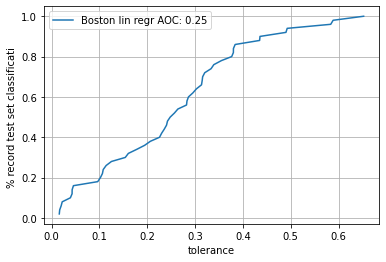

In [ ]:

def rec_curve(pred,gt):

  assert pred.shape==gt.shape

  errors=np.abs(np.array((pred.detach()-gt)))
  tolerance=sorted(np.unique(errors))
  correct=[]

  for t in tolerance:
    correct.append((errors<=t).mean())

  AUC=np.trapz(correct,tolerance)
  tot_area=np.max(tolerance)
  AOC=tot_area-AUC

  return tolerance,correct,AOC

boston_linear_regressor_rec=rec_curve(preds_testing.view(-1),Y_testing)
plt.plot(boston_linear_regressor_rec[0],boston_linear_regressor_rec[1])
plt.legend(['Boston lin regr AOC: %0.2f' %boston_linear_regressor_rec[2]])
plt.xlabel('tolerance')
plt.ylabel('% record test set classificati ')
plt.grid()
plt.show()


SyntaxError: ignored

Text(0, 0.5, 'y')

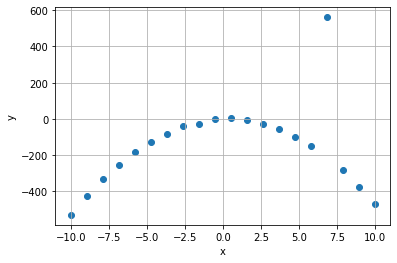

In [ ]:
###############################################################################
from sklearn.datasets import load_boston
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt
np.random.seed(123)
torch.random.manual_seed(123);
boston = load_boston()
X = boston.data
Y = boston.target
X=np.linspace(-10,10,20)
X=np.column_stack([X,X**2,X**3,X**4])
Y=3*X[:,0]-5*X[:,0]**2+np.random.randn(20)*1/np.random.randn(20)

#Y=3*X[:,0]+10*np.sin((X[:,0]))

idx = np.random.permutation(len(X))
X = X[idx]
Y = Y[idx]
X_training = torch.Tensor(X[:15])
Y_training = torch.Tensor(Y[:15])
X_testing = torch.Tensor(X[15:])
Y_testing = torch.Tensor(Y[15:])
#print(X.shape,Y.shape)
plt.scatter(X[:,0],Y)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
class LinearRegressor(nn.Module):

  def __init__(self, in_size, out_size):
    """Costruisce un regressore logistico.
    Input:
    in_size: numero di feature in input (es. 13)
    out_size: numero di elementi in output (es. 1)"""
    super(LinearRegressor, self).__init__() #richiamo il costruttore della supe
    # rclasse
    # #questo passo è necessario per abilitare alcuni meccanismi automatici dei m
    # oduli di PyTorch

    self.linear = nn.Linear(in_size,out_size)
  def forward(self,x):
    """Definisce come processare l'input x"""
    result = self.linear(x)

    return result

In [ ]:
from torch.utils.tensorboard import SummaryWriter
lr = 0.0000001
epochs = 5000
writer = SummaryWriter('logs/linear_regressor_1')
#normalizzazione dei dati
means = X_training.mean(0)
stds = X_training.std(0)
X_training_norm = (X_training-means)/stds
X_testing_norm = (X_testing-means)/stds

X_training_norm = (X_training)
X_testing_norm = (X_testing)


reg = LinearRegressor(4,1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(reg.parameters(),lr=lr,momentum=0.9,weight_decay=0.01)
for e in range(epochs):
  reg.train()
  output = reg(X_training_norm)
  l = criterion(output.view(-1),Y_training)

  writer.add_scalar('loss/train', l.item(), global_step=e)
  l.backward()
  optimizer.step()
  optimizer.zero_grad()


for name, param in reg.named_parameters():
    if param.requires_grad:
        print(name, param.data)

print(reg.parameters())

linear.weight tensor([[28.2055,  0.6605, -0.2255, -0.0562]])
linear.bias tensor([-9.9242])
<generator object Module.parameters at 0x7f30140210d0>


In [ ]:
def RMSE(predictions, gt):
  assert predictions.shape == gt.shape
  return ((predictions-gt)**2).mean()**(1/2)

preds_training=reg(X_training_norm)
preds_testing=reg(X_testing_norm)  
print("Root Mean Squared Error (RMSE) di training: {:0.2f}".format(RMSE(preds_training.view(-1),Y_training)))
print("Root Mean Squared Error (RMSE) di testing: {:0.2f}".format(RMSE(preds_testing.view(-1),Y_testing)))

Root Mean Squared Error (RMSE) di training: 166.94
Root Mean Squared Error (RMSE) di testing: 109.06


torch.Size([15, 4]) torch.Size([15, 1])


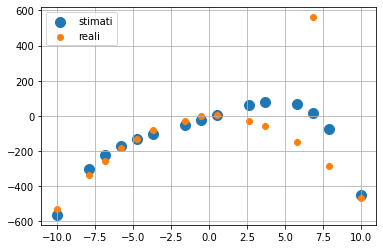

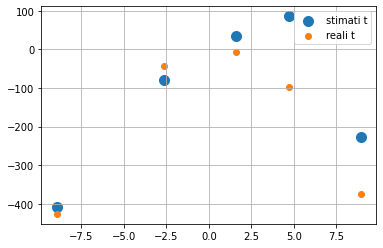

In [ ]:
print(X_training.shape,preds_training.shape)
plt.scatter(X_training[:,0],preds_training.detach(),label='stimati',s=100)
plt.scatter(X_training[:,0],Y_training,label='reali')

plt.legend()
plt.grid()
plt.figure()
plt.scatter(X_testing[:,0],preds_testing.detach(),label='stimati t',s=100)
plt.scatter(X_testing[:,0],Y_testing,label='reali t')
plt.legend()
plt.grid()

In [ ]:
print(Y_training,preds_training)
print(Y_testing,preds_testing)


tensor([-468.6384,  -27.5732, -255.8794,  -81.5949,  -55.9015,  -26.2402,
        -147.7201, -531.4723, -184.4970, -335.6209,   -1.9582,  561.5756,
        -128.9884,    2.8498, -284.7727]) tensor([[-449.5482],
        [  62.0682],
        [-222.9521],
        [-103.9526],
        [  81.3194],
        [ -52.2741],
        [  68.5828],
        [-562.5690],
        [-170.4723],
        [-298.8406],
        [ -24.5576],
        [  18.5297],
        [-133.0406],
        [   5.0666],
        [ -75.4512]], grad_fn=<AddmmBackward>)
tensor([-426.4501, -374.5765,   -7.6947,  -42.2206,  -98.4565]) tensor([[-408.1550],
        [-226.5336],
        [  35.0202],
        [ -78.1608],
        [  86.2258]], grad_fn=<AddmmBackward>)


In [ ]:
### ESERCIZIO ONE VS ALL

from sklearn.datasets import load_iris

df=load_iris()
X=torch.Tensor(df.data)
y=torch.Tensor(df.target)
print(df.DESCR)
print(X.shape,y.shape)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward>)
Accuracy: (1.0,)
tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]], grad_fn=<RoundBackward>)
Accuracy: (0.7410714285714286,)
tensor([[0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.]], grad_fn=<RoundBackward>)
Accuracy: (0.9017857142857143,)
quiii
tensor([2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 1., 1., 2., 0., 2., 1., 1.,
        1., 0., 2., 2., 2., 1., 1., 2., 2., 1., 1., 2., 0., 0., 2., 1., 2., 1.,
        1., 0.])
[[ 8  0  0]
 [ 0  8  4]
 [ 0  3 15]]
[[42  0  0]
 [ 0 27 11]
 [ 0  6 26]]


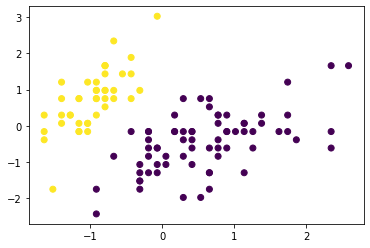

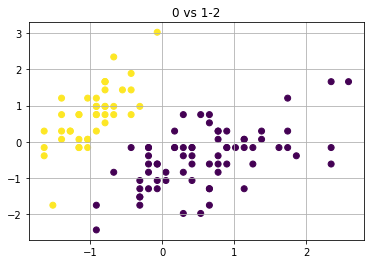

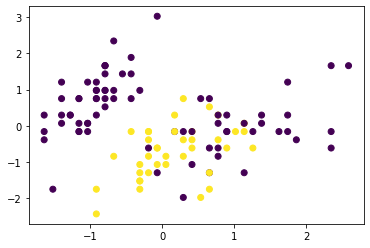

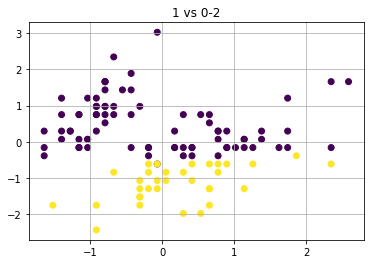

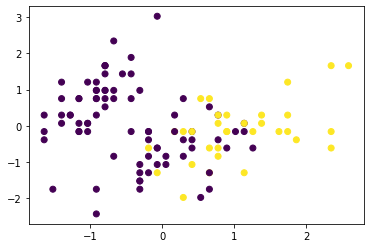

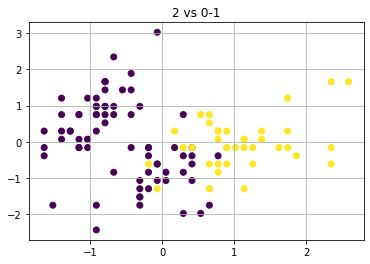

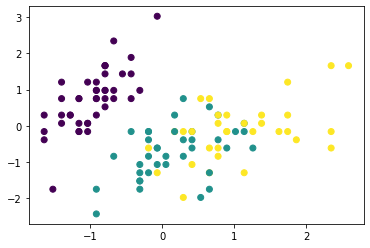

In [ ]:
import torch
from torch import  nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

class LogisticRegressorOneVsAll(nn.Module):

  ##Classificatori Binari diversi
  def __init__(self,in_features,out_features):

    super(LogisticRegressorOneVsAll,self).__init__()
    self.models=[]
    for _ in range(out_features):
      self.models.append((nn.Linear(in_features,1)))

    self.loss = nn.BCELoss()
    self.logistic=nn.Sigmoid()

  def fit(self,X_training,Y_training,X_testing,Y_testing,epochs=100,lr=0.001):
      

      self.means = X_training.mean(0)
      self.stds = X_training.std(0)

      X_training_norm = (X_training-self.means)/self.stds
      X_testing_norm = (X_testing-self.means)/self.stds
      # #Passo 2: inizializziamo il modello

      ## CLASSE 0 vs 1-2
      sgd = torch.optim.SGD(self.models[0].parameters(), lr,momentum=0.9,weight_decay=0.01)
      mapper={0:1,1:0,2:0}
      map_=np.vectorize(lambda x :mapper[x])
      Y_training_0=torch.Tensor(map_(y_train))
      

      for e in range(epochs):
        self.models[0].train()
        p=self.models[0](X_training_norm)
        l=self.loss(self.logistic(p),Y_training_0.view(-1,1))
        l.backward()

        sgd.step()
        sgd.zero_grad()

      # print(self.models[0].state_dict())
      # print(Y_training_0)
      # print(self.logistic(self.models[0](X_training_norm)))


    ### CLASSE 1 vs 0-2

      sgd = torch.optim.SGD(self.models[1].parameters(), lr,momentum=0.9,weight_decay=0.01)
      mapper={0:0,1:1,2:0}
      map_=np.vectorize(lambda x :mapper[x])
      Y_training_1=torch.Tensor(map_(y_train))
      

      for e in range(epochs):
        self.models[1].train()
        p=self.models[1](X_training_norm)

        l=self.loss(self.logistic(p),Y_training_1.view(-1,1))
        l.backward()

        sgd.step()
        sgd.zero_grad()

    ### CLASSE 2 vs 0-1

      sgd = torch.optim.SGD(self.models[2].parameters(), lr,momentum=0.9,weight_decay=0.01)
      mapper={0:0,1:0,2:1}
      map_=np.vectorize(lambda x :mapper[x])
      Y_training_2=torch.Tensor(map_(y_train))
      

      for e in range(epochs):
        self.models[2].train()
        p=self.models[2](X_training_norm)

        l=self.loss(self.logistic(p),Y_training_2.view(-1,1))
        l.backward()

        sgd.step()
        sgd.zero_grad()
      


      p_0_test=self.logistic(self.models[0](X_training_norm))
      #print(p_0_test[:10])
      print(p_0_test[:10].round())
      p_0_test=p_0_test.detach().round()
      
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=Y_training_0)
      plt.figure()
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=p_0_test.detach())
      
      plt.grid()
      plt.title("0 vs 1-2")
      plt.figure()
      print("Accuracy:", self.accuracy(p_0_test,Y_training_0))

      p_0_test=self.logistic(self.models[1](X_training_norm))
      #print(p_0_test[:10])
      print(p_0_test[:10].round())
      p_0_test=p_0_test.detach().round()
      
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=Y_training_1)
      plt.figure()
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=p_0_test.detach())
      
      plt.grid()
      plt.title("1 vs 0-2")
      print("Accuracy:", self.accuracy(p_0_test,Y_training_1))

      plt.figure()
      p_0_test=self.logistic(self.models[2](X_training_norm))
      #print(p_0_test[:10])
      print(p_0_test[:10].round())
      p_0_test=p_0_test.detach().round()
      
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=Y_training_2)
      plt.figure()
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=p_0_test.detach())
      
      plt.grid()
      plt.title("2 vs 0-1")
      print("Accuracy:", self.accuracy(p_0_test,Y_training_2))
      plt.figure()
      plt.scatter(X_training_norm[:,0],X_training_norm[:,1],c=Y_training)



  def accuracy(self,pred,gt):

      correct=pred.view(-1).byte()==gt.view(-1).byte()
    


      return float(correct.sum())/len(correct),

  def predict_proba(self,X_test):
    
    X_testing_norm = (X_test-self.means)/self.stds
      
    a=self.logistic(self.models[0](X_testing_norm))
    b=self.logistic(self.models[1](X_testing_norm))
    c=self.logistic(self.models[2](X_testing_norm))
    
    return torch.cat((a,b,c),1)

  def predict_class(self,X_test):

    return (self.predict_proba(X_test)).max(1)[1]


  # def forward(self,x):
  #   logits=self.linear(x)
  #   return self.logistic(logits)
  

X_train,X_test,y_train,y_test=train_test_split(X,y)

model=LogisticRegressorOneVsAll(4,3)
model.fit(X_train,y_train,X_test,y_test,epochs=10000,lr=0.0001)
print("quiii")
a=model.predict_class(X_test)
print(y_test)
print(confusion_matrix(y_test,a))
print(confusion_matrix(y_train,model.predict_class(X_train)))
# p_test=regressor(X_testing_norm)
# print(loss(p_test,Y_testing.view(-1,1)))

# pr_train=regressor(X_training_norm)
# pr_test=regressor(X_testing_norm)

# pred_train=pr_train>=0.5
# pred_test=pr_test>=0.5



# def accuracy(pred,gt):
#   correct=pred.view(-1).byte()==gt.view(-1).byte()

#   return float(correct.sum())/len(correct)


# print("Accuracy di training: {:0.2f}".format(accuracy(pred_train,Y_training)))
# print("Accuracy di test: {:0.2f}".format(accuracy(pred_test,Y_testing)))
# pred=pred_train
# # print(pred)
# print(pred.view(-1))
# print(pred.view(-1).shape)

# print(pred.view(-1).byte())


In [ ]:
!nvidia-smi

Thu Apr 15 10:49:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    28W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
from collections import Counter

mapper={0:1,1:0,2:0}
Y_training_0=np.vectorize(lambda x :mapper[x])
Y_training_0(y_train)
print(Counter(Y_training_0(y_train)))
print(Counter(y_train))

Counter({0: 78, 1: 34})
Counter({2: 41, 1: 37, 0: 34})


In [ ]:
### one vs one da fare !!